In [59]:
#install.packages("rpart.plot")
#install.packages("randomForest")

library(randomForest)
library(rpart)
library(IRdisplay)
library(rpart.plot)

In [106]:
print_accuracy_table <- function(predicted, expected) {
    pred_table <- as.matrix(table(Predicted = predicted, Expected = expected))
    display(pred_table)
    print(sprintf("Acuracy: %.4f", (pred_table[1,1] + pred_table[2,2]) / sum(pred_table)))
    print(sprintf("Normalized Acuracy: %.4f", ( pred_table[2,2] / (pred_table[2,2] + pred_table[1,2]) + pred_table[1,1] / (pred_table[1,1] + pred_table[2,1]) ) / 2))
    print(sprintf("True Positive Acuracy: %.4f", (pred_table[2,2]) / (pred_table[2,2] + pred_table[1,2])))
    print(sprintf("True Negative Acuracy: %.4f", (pred_table[1,1]) / (pred_table[1,1] + pred_table[2,1])))
}

In [2]:
#Read datasets
datasets <- list(
    Train = read.csv("kyphosis_train.data"),
    Validation = read.csv("kyphosis_val.data")
)
#summary(datasets$Train)

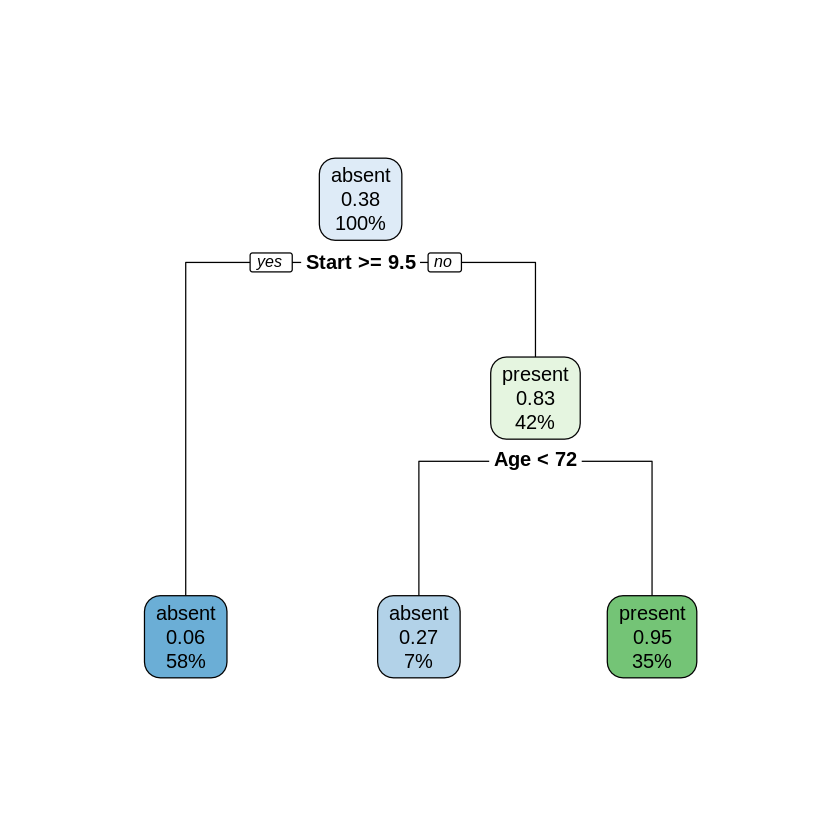

In [16]:
treeModel <- rpart(
    formula = Kyphosis ~ Age + Number + Start,
    data = datasets$Train,
    method = "class",
    parms = list(split="Gini"))
#treeModel
#summary(treeModel)
rpart.plot(treeModel)

In [69]:
pred <- predict(treeModel, datasets$Validation)
pred <- ifelse(pred[,1] > 0.5, 'absent', 'present')
print_accuracy_table(pred, datasets$Validation$Kyphosis)
#datasets
#?rpart

         Expected
Predicted absent present
  absent      22       3
  present      2      12

[1] "Acuracy: 0.8718"
[1] "Normalized Acuracy: 0.8583"
[1] "True Positive Acuracy: 0.8000"
[1] "True Negative Acuracy: 0.9167"


In [117]:
forestModel <- randomForest(    
    formula = Kyphosis ~ Age + Number + Start,
    data = datasets$Train,
    ntree=15)
pred <- predict(forestModel, datasets$Validation)
print_accuracy_table(pred, datasets$Validation$Kyphosis)

         Expected
Predicted absent present
  absent      22       3
  present      2      12

[1] "Acuracy: 0.8718"
[1] "Normalized Acuracy: 0.8583"
[1] "True Positive Acuracy: 0.8000"
[1] "True Negative Acuracy: 0.9167"


In [78]:
wine.datasets <- list(
    Train = read.csv("../Trabalho2 - Wine Quality/wineQuality_train.data"),
    Validation = read.csv("../Trabalho2 - Wine Quality/wineQuality_val.data"),
    Test =  read.csv("../Trabalho2 - Wine Quality/wineQuality_test.data")
)
for (ds in names(wine.datasets)) {
    wine.datasets[[ds]]$quality <- as.factor(wine.datasets[[ds]]$quality)
}
wine.forest.model <- randomForest(    
    formula = quality ~ .,
    data = wine.datasets$Train,
    mtry = 5,
    ntree = 50)
wine.pred <- predict(wine.forest.model, wine.datasets$Validation)
#wine.pred
#pred
print_accuracy_table(wine.pred, wine.datasets$Validation$quality)

         Expected
Predicted   0   1
        0 457 645
        1   6 191

[1] "Acuracy: 0.4988"
[1] "Normalized Acuracy: 0.6078"
[1] "True Positive Acuracy: 0.2285"
[1] "True Negative Acuracy: 0.9870"


Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”

            Expected
Predicted    setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

[1] "Acuracy: 0.6667"
[1] "Normalized Acuracy: 1.0000"
[1] "True Positive Acuracy: 1.0000"
[1] "True Negative Acuracy: 1.0000"


            Expected
Predicted    setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

[1] "Acuracy: 0.6667"
[1] "Normalized Acuracy: 1.0000"
[1] "True Positive Acuracy: 1.0000"
[1] "True Negative Acuracy: 1.0000"


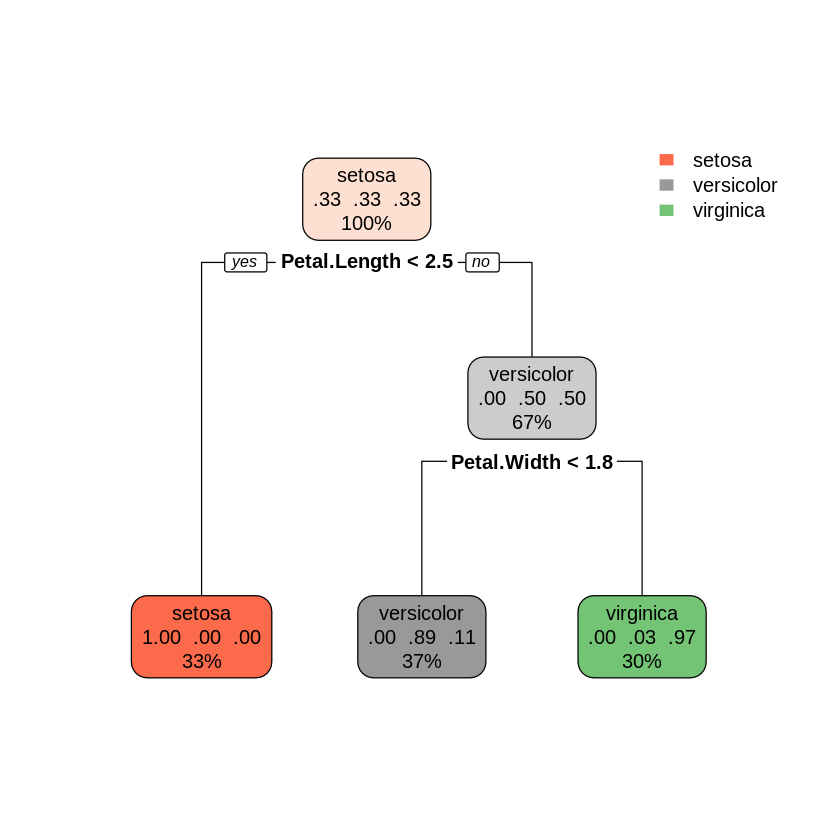

In [116]:
iris.indices <- c(sample(1:50, 10),sample(51:100, 10), sample(101:150, 10))
iris.datasets <- list(
    Train = iris[setdiff(1:150, iris.indices),],
    Validation = iris[iris.indices,]
)

iris.forest.model <- randomForest(    
    formula = Species ~ .,
    data = iris.datasets$Train,
    mtry = 5,
    ntree = 50)
iris.pred <- predict(iris.forest.model, iris.datasets$Validation)
#wine.pred
#pred
print_accuracy_table(iris.pred, iris.datasets$Validation$Species)



iris.tree.mode <- rpart(
    formula = Species ~ .,
    data = iris.datasets$Train,
    method = "class",
    parms = list(split="Gini"))
#iris.tree.mode
#summary(iris.tree.mode)
rpart.plot(iris.tree.mode)

iris.pred <- predict(iris.forest.model, iris.datasets$Validation, type='class')
print_accuracy_table(iris.pred, iris.datasets$Validation$Species)
